In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as sts
%matplotlib inline
import math
matplotlib.rcParams['figure.figsize'] = (6, 6)

Задаем случайную велиичну, распределенную по Парето со стандарными параметрами $loc=0, scale=1$.

In [2]:
b = 5
par_rv = sts.pareto(b, loc = 0, scale = 1)

Генерируем выборку объёма 1000 и строим гистограмму.

Cтроим график теоретической плотности распределения случайной величины.

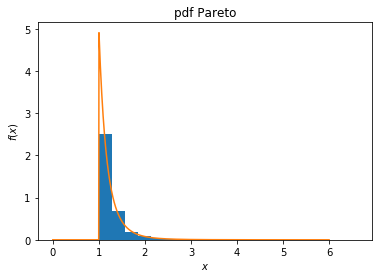

In [3]:
t = 1000
x_t = par_rv.rvs(size = t)
plt.hist(x_t, density=True, bins = 20)

x = np.linspace(0,6,1000)
pdf = par_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
title = plt.title('pdf Pareto')


Задаем значения n, для которых будем проводить эксперимент.

Для каждого значения n генерируем 1000 выборок объема n, считаем выборочную среднюю и записываем в вектор.
Вектор сохраняем в словарь с ключом n. 

Для каждого n строим гистограммы выборочных средних.

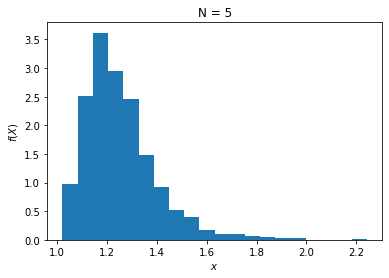

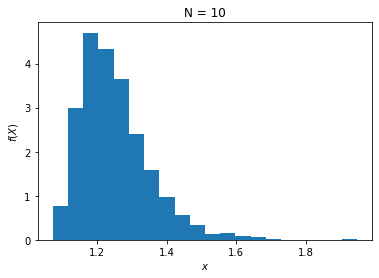

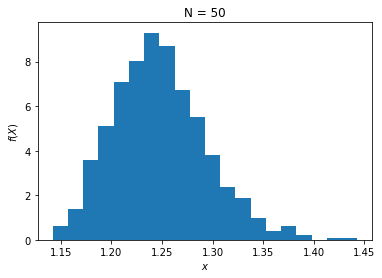

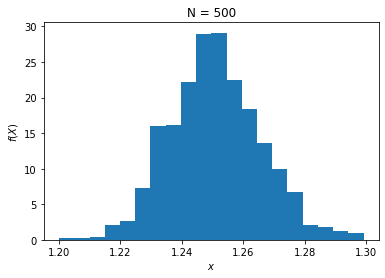

In [4]:
exper = [5, 10, 50, 500]
sample = dict()
for n in exper:
    aver_vect = []
    for i in range(0, 1000):
        aver = 0
        x_n = par_rv.rvs(size = n)
        for j in range(0, n):
            aver = aver + x_n[j]
        aver_vect.append(aver/n)
    sample[n] = aver_vect
    plt.hist(sample[n], density=True, bins = 20)
    plt.ylabel('$f(X)$')
    plt.xlabel('$x$')
    plt.title('N = %s' %n)
    plt.show()

Рассчитываем мат.ожидание и дисперсию исходного распредения согласно формулам из википедии:

$EX = b/(b-1)$

$DX = ((1/(b - 1))^2 * (b/(b - 2))$

In [5]:
aver_pareto = b / (b - 1)
disp = (1 / (b - 1)) ** 2 * (b / (b - 2))

Используя ЦПТ рассчитываем для каждого n стандартное отклонение выборочных средних.

In [6]:
st_dev = dict()
for n in exper:
    dev = np.sqrt(disp / n)
    st_dev[n] = dev

Для каждого n строим гистограмму распределения выборочных средних и нормальное распределение с параметрами, рассчитанными по ЦПТ.

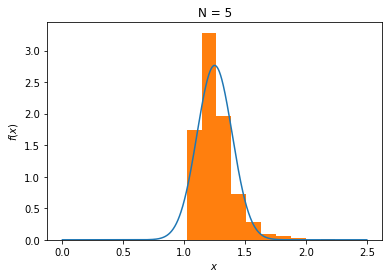

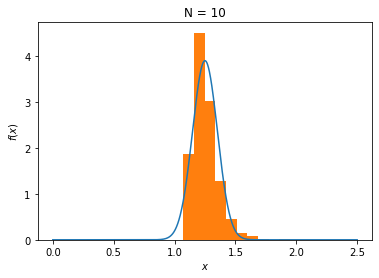

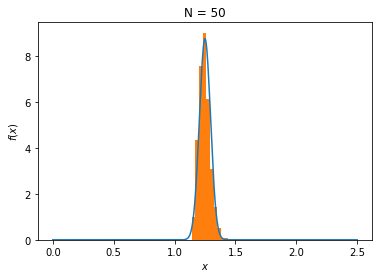

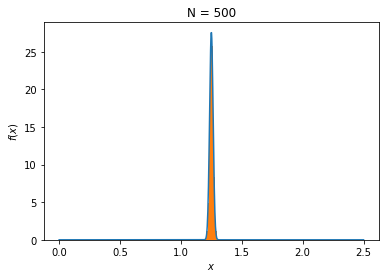

In [7]:
for n in exper:
    sigma = st_dev[n]
    norm_rv = sts.norm(loc = aver_pareto, scale = sigma)
    x = np.linspace(0, 2.5, 1000)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.title('N = %s' %n)
    plt.hist(sample[n], density=True)
    plt.show()

# Вывод
Из графиков видно, что при увеличении объема выборки гистограмма становится более гладкой. Кроме того, чем больше n, тем больше гистограмма сужается вокруг среднего значения и приближается к графику нормального распределения, построенного согласно центральной предельной теореме. 

Этот пример хорошо иллюстрирует, как работает ЦПТ.